In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pyspark as ps
from tqdm import tqdm
from pprint import pprint
import datetime as dt
import json
from pyspark.sql.functions import col, array_contains
from scipy import stats
from scipy.stats import binom
from scipy.stats import uniform

In [3]:
df = pd.read_csv('2018-05-28-2021-06-07.csv')
df

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8046848,170,COL7491,7491,28 May 2021,2021,1,Protests,Peaceful protest,Protesters (Colombia),...,Bogota - Tunjuelito,4.5564,-74.1224,1,El Espectador,National,"On 28 May 2021, in Bogota - Tunjuelito, Bogota...",0,1622481034,COL
1,8049920,104,MMR17625,17625,28 May 2021,2021,1,Protests,Peaceful protest,Protesters (Myanmar),...,Mandalay,21.9747,96.0836,2,Myanmar Pressphoto Agency; Myanmar Labour News,National,"On 28 May 2021, in Mandalay city (Mandalay Reg...",0,1622566819,MMR
2,8051712,380,ITA9293,9293,28 May 2021,2021,1,Protests,Peaceful protest,Protesters (Italy),...,Novellara,44.8420,10.7275,1,TG COM,National,"On 28 May 2021, in the evening, a few hundred ...",0,1622575879,ITA
3,8051713,826,GBR3017,3017,28 May 2021,2021,1,Protests,Peaceful protest,Protesters (United Kingdom),...,Brunswick,50.8244,-0.1591,1,The Argus,National,"On 28 May 2021, about 50 protesters gathered o...",0,1622575879,GBR
4,8049154,484,MEX46493,46493,28 May 2021,2021,1,Protests,Peaceful protest,Protesters (Mexico),...,Tepic,21.5074,-104.8938,1,nncMX,Subnational,"On 28 May 2021, in Tepic, Nayarit, young peopl...",0,1622495666,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698405,5862398,760,SYR33425,33425,28 May 2018,2018,1,Battles,Armed clash,Military Forces of Syria (2000-),...,Tadaf,36.3479,37.5294,1,SOHR,Other,Regime and loyalist militia forces clashed wit...,0,1567462273,SYR
698406,7372798,76,BRA28941,28941,28 May 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,Maceio,-9.6658,-35.7353,1,Jornal do Commercio,National,"On 28 May 2018, in Maceio, Alagoas, a group of...",0,1607555045,BRA
698407,6063358,356,IND31356,31356,28 May 2018,2018,1,Battles,Armed clash,CPI (Maoist): Communist Party of India (Maoist),...,Daltonganj,24.0397,84.0658,2,Asian News International,National,3 Maoists were fatally shot in a battle with C...,3,1618534087,IND
698408,7442174,76,BRA29608,29608,28 May 2018,2018,1,Riots,Violent demonstration,Rioters (Brazil),...,Varzea Paulista,-23.2113,-46.8283,1,G1,National,"On 28 May 2018, in Varzea Paulista, Sao Paulo,...",0,1609973139,BRA


In [4]:
"battle scale","protest fatality","terror attack ratio","condition of violent demonstration","Armed Clash","Gang fire"

('battle scale',
 'protest fatality',
 'terror attack ratio',
 'condition of violent demonstration',
 'Armed Clash',
 'Gang fire')

In [5]:
df.groupby('sub_event_type').count()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
sub_event_type,,,,,,,,,,,,,,,,,,,,,
Abduction/forced disappearance,7058,7058,7058,7058,7058,7058,7058,7058,7058,623,...,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058
Agreement,781,781,781,781,781,781,781,781,781,109,...,781,781,781,781,781,781,781,781,781,781
Air/drone strike,22217,22217,22217,22217,22217,22217,22217,22217,22217,3565,...,22217,22217,22217,22217,22217,22217,22217,22217,22217,22217
Armed clash,121343,121343,121343,121343,121343,121343,121343,121343,121343,11958,...,121343,121343,121343,121343,121343,121343,121343,121343,121343,121343
Arrests,4038,4038,4038,4038,4038,4038,4038,4038,4038,706,...,4038,4038,4038,4038,4038,4038,4038,4038,4038,4038
Attack,65565,65565,65565,65565,65565,65565,65565,65565,65565,3496,...,65565,65565,65565,65565,65565,65565,65565,65565,65565,65565
Change to group/activity,7491,7491,7491,7491,7491,7491,7491,7491,7491,1699,...,7491,7491,7491,7491,7491,7491,7491,7491,7491,7491
Chemical weapon,5,5,5,5,5,5,5,5,5,1,...,5,5,5,5,5,5,5,5,5,5
Disrupted weapons use,3931,3931,3931,3931,3931,3931,3931,3931,3931,473,...,3931,3931,3931,3931,3931,3931,3931,3931,3931,3931


In [6]:
df.groupby('location').count()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,admin3,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
location,,,,,,,,,,,,,,,,,,,,,
1 de Maio,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
10th Armored Division,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10th of Ramadan City,8,8,8,8,8,8,8,8,8,8,...,0,8,8,8,8,8,8,8,8,8
11 de Febrero,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
112th Brigade,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eThekwini,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
s-Heerenberg,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
uMbogintwini,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
df.groupby('event_type').count()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,sub_event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
event_type,,,,,,,,,,,,,,,,,,,,,
Battles,125745,125745,125745,125745,125745,125745,125745,125745,125745,13681,...,125745,125745,125745,125745,125745,125745,125745,125745,125745,125745
Explosions/Remote violence,87868,87868,87868,87868,87868,87868,87868,87868,87868,7491,...,87868,87868,87868,87868,87868,87868,87868,87868,87868,87868
Protests,333406,333406,333406,333406,333406,333406,333406,333406,333406,233597,...,333406,333406,333406,333406,333406,333406,333406,333406,333406,333406
Riots,45256,45256,45256,45256,45256,45256,45256,45256,45256,25068,...,45256,45256,45256,45256,45256,45256,45256,45256,45256,45256
Strategic developments,32431,32431,32431,32431,32431,32431,32431,32431,32431,5964,...,32431,32431,32431,32431,32431,32431,32431,32431,32431,32431
Violence against civilians,73704,73704,73704,73704,73704,73704,73704,73704,73704,4274,...,73704,73704,73704,73704,73704,73704,73704,73704,73704,73704


In [8]:
df2=df.loc[df['event_type']=='Protests']
df2['data_id'].count()

333406

In [9]:
d3=df2.groupby(['country','region','sub_event_type'])['fatalities'].sum()
d3.sort_values(ascending=False)

country    region           sub_event_type                    
Myanmar    Southeast Asia   Excessive force against protesters    370
Sudan      Northern Africa  Excessive force against protesters    208
Nicaragua  Central America  Excessive force against protesters    180
Ethiopia   Eastern Africa   Excessive force against protesters    150
Iraq       Middle East      Excessive force against protesters    120
                                                                 ... 
Ghana      Western Africa   Protest with intervention               0
                            Peaceful protest                        0
                            Excessive force against protesters      0
Germany    Europe           Protest with intervention               0
eSwatini   Southern Africa  Protest with intervention               0
Name: fatalities, Length: 442, dtype: int64

In [10]:
dz=df.groupby('actor1')['fatalities'].sum()
dz.sort_values(ascending=False)

actor1
Military Forces of Afghanistan (2014-)                        60940
Military Forces of Yemen (2016-) Supreme Political Council    37169
Taliban                                                       27566
Military Forces of Yemen (2012-)                              21219
Unidentified Gang (Mexico)                                    13692
                                                              ...  
Opposition Bloc                                                   0
Opposition Platform - For Life                                    0
FNPL: Fatherland and Liberty Nationalist Front                    0
Organisation Anarchist Action                                     0
Zouar Communal Militia (Chad)                                     0
Name: fatalities, Length: 6099, dtype: int64

In [11]:
ds2_example=df2.groupby('sub_event_type')['fatalities'].sum()
ds2_example.sort_values(ascending=False)

sub_event_type
Excessive force against protesters    1431
Peaceful protest                         2
Protest with intervention                0
Name: fatalities, dtype: int64

In [12]:
ds2=df2.loc[df2['sub_event_type']=='Excessive force against protesters']
ds2['data_id'].count(),ds2['fatalities'].sum(),(ds2['fatalities'].sum()/ds2['data_id'].count())

(1603, 1431, 0.8927011852776044)

In [13]:
ds3=ds2.loc[df2['country']=='Myanmar']
ds3['data_id'].count(),ds3['fatalities'].sum(),(ds3['fatalities'].sum()/ds3['data_id'].count())

(214, 370, 1.7289719626168225)

In [14]:
df2_p=df.loc[df['sub_event_type']=='Peaceful protest']
df2_p['data_id'].count(),ds2['data_id'].count(),(ds2['data_id'].count()/df2_p['data_id'].count())

(316121, 1603, 0.005070843126524337)

In [15]:
dfP_m=df2_p.loc[df2_p['country']=='Myanmar']
dfP_m['data_id'].count(),ds3['data_id'].count(),(ds3['data_id'].count()/dfP_m['data_id'].count())

(4364, 214, 0.04903758020164986)

In [16]:
d_pr1=ds2.loc[ds2['region']=='Southeast Asia']
d_pr2=ds2.loc[ds2['region']=='Northern Africa']
d_pr3=ds2.loc[ds2['region']=='Central America']
d_pr4=ds2.loc[ds2['region']=='Middle East']
d_pr5=ds2.loc[ds2['region']=='Eastern Africa']

df2_pr1=df2_p.loc[df2_p['region']=='Southeast Asia']
df2_pr2=df2_p.loc[df2_p['region']=='Northern Africa']
df2_pr3=df2_p.loc[df2_p['region']=='Central America']
df2_pr4=df2_p.loc[df2_p['region']=='Middle East']
df2_pr5=df2_p.loc[df2_p['region']=='Eastern Africa']

In [17]:
d_pr1.groupby('country')['fatalities'].sum(),d_pr1.groupby('country')['data_id'].count(),df2_pr1.groupby('country')['data_id'].count()

(country
 Cambodia         0
 Indonesia        1
 Myanmar        370
 Philippines      0
 Thailand         0
 Vietnam          0
 Name: fatalities, dtype: int64,
 country
 Cambodia         5
 Indonesia       11
 Myanmar        214
 Philippines      2
 Thailand         1
 Vietnam          3
 Name: data_id, dtype: int64,
 country
 Cambodia        188
 Indonesia      2821
 Laos              1
 Malaysia        319
 Myanmar        4364
 Philippines     733
 Thailand       1427
 Vietnam          39
 Name: data_id, dtype: int64)

In [18]:
d_pr2.groupby('country')['fatalities'].sum(),d_pr2.groupby('country')['data_id'].count(),df2_pr2.groupby('country')['data_id'].count()

(country
 Algeria      0
 Egypt        0
 Libya        3
 Morocco      1
 Sudan      208
 Tunisia      0
 Name: fatalities, dtype: int64,
 country
 Algeria     2
 Egypt       5
 Libya       9
 Morocco     5
 Sudan      99
 Tunisia     2
 Name: data_id, dtype: int64,
 country
 Algeria    5204
 Egypt       237
 Libya       344
 Morocco    2696
 Sudan      1550
 Tunisia    3433
 Name: data_id, dtype: int64)

In [19]:
d_pr3.groupby('country')['fatalities'].sum(),d_pr3.groupby('country')['data_id'].count(),df2_pr3.groupby('country')['data_id'].count()

(country
 Belize           0
 Costa Rica       0
 El Salvador      0
 Guatemala        0
 Honduras         3
 Nicaragua      180
 Name: fatalities, dtype: int64,
 country
 Belize           1
 Costa Rica       5
 El Salvador      1
 Guatemala        2
 Honduras         8
 Nicaragua      114
 Name: data_id, dtype: int64,
 country
 Belize           58
 Costa Rica      849
 El Salvador     503
 Guatemala       635
 Honduras        899
 Nicaragua       175
 Panama         1228
 Name: data_id, dtype: int64)

In [20]:
d_pr4.groupby('country')['fatalities'].sum(),d_pr4.groupby('country')['data_id'].count(),df2_pr4.groupby('country')['data_id'].count()

(country
 Bahrain        1
 Iran           0
 Iraq         120
 Israel         0
 Lebanon        1
 Palestine      3
 Syria         20
 Turkey         3
 Yemen         25
 Name: fatalities, dtype: int64,
 country
 Bahrain       2
 Iran          9
 Iraq         66
 Israel        7
 Lebanon      12
 Palestine    84
 Syria        36
 Turkey        7
 Yemen        47
 Name: data_id, dtype: int64,
 country
 Bahrain                 1223
 Iran                    6798
 Iraq                    3453
 Israel                  8206
 Jordan                   442
 Kuwait                    37
 Lebanon                 6163
 Oman                      16
 Palestine                672
 Qatar                     15
 Saudi Arabia               5
 Syria                   1405
 Turkey                  4001
 United Arab Emirates       1
 Yemen                   1657
 Name: data_id, dtype: int64)

In [21]:
d_pr5.groupby('country')['fatalities'].sum(),d_pr5.groupby('country')['data_id'].count(),df2_pr5.groupby('country')['data_id'].count()

(country
 Burundi          0
 Djibouti         0
 Ethiopia       150
 Kenya            5
 Malawi           0
 Mozambique       0
 Somalia          8
 South Sudan      0
 Uganda           4
 Name: fatalities, dtype: int64,
 country
 Burundi         1
 Djibouti        5
 Ethiopia       70
 Kenya           8
 Malawi          1
 Mozambique      3
 Somalia        22
 South Sudan     1
 Uganda         18
 Name: data_id, dtype: int64,
 country
 Burundi        108
 Djibouti        40
 Eritrea          1
 Ethiopia       351
 Kenya          285
 Madagascar      72
 Malawi         166
 Mozambique      45
 Rwanda           3
 Somalia        251
 South Sudan     66
 Tanzania        18
 Uganda         217
 Name: data_id, dtype: int64)

In [22]:
d4=df2_p.groupby('region')['data_id'].count()
d4_example2=ds2.groupby('region')['data_id'].count()
d4_example1=ds2.groupby('region')['fatalities'].sum()
d4.sort_values(ascending=False),d4_example2.sort_values(ascending=False),d4_example1.sort_values(ascending=False)


(region
 South Asia                   68454
 Europe                       63654
 North America                42699
 South America                34414
 Middle East                  34094
 East Asia                    26929
 Northern Africa              13464
 Southeast Asia                9892
 Caucasus and Central Asia     6637
 Central America               4347
 Western Africa                4196
 Southern Africa               2923
 Eastern Africa                1623
 Middle Africa                 1451
 Caribbean                     1344
 Name: data_id, dtype: int64,
 region
 Middle East                  270
 Southeast Asia               236
 South America                193
 North America                142
 Central America              131
 Eastern Africa               129
 Northern Africa              122
 Western Africa                91
 Middle Africa                 71
 Europe                        70
 South Asia                    58
 East Asia                     30
 Carib

(array([180.,  26.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

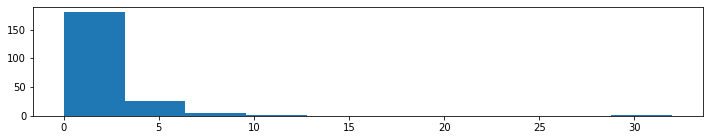

In [104]:
fig, ax = plt.subplots(figsize=(12, 2))
plt.hist(ds3['fatalities'])

(array([1.589e+03, 1.100e+01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

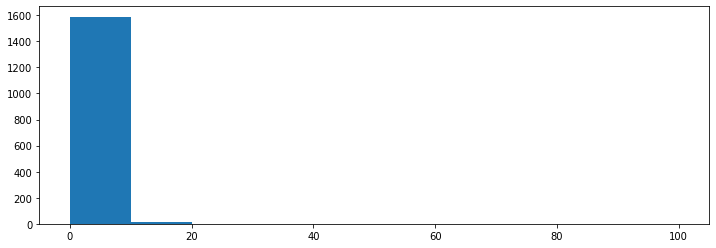

In [98]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.hist((ds2['fatalities']))

In [99]:
gpc=ds2['data_id'].count()
mpc=ds3['data_id'].count()
ste_gp=np.std(ds2['fatalities']) / np.sqrt(gpc)
ste_mp=np.std(ds3['fatalities']) / np.sqrt(mpc)
ste_gp,ste_mp

(0.07832374009786384, 0.19549697336795188)

In [100]:
gfm=ds2['fatalities'].mean()
mfm=ds3['fatalities'].mean()
gp_dist=stats.norm(loc=gfm, scale=ste_gp)
mp_dist=stats.norm(loc=mfm, scale=ste_mp)
critical_value_right = gp_dist.ppf(1 - 0.04)
critical_value_left = gp_dist.ppf(0.04)

gfm,mfm

(0.8927011852776044, 1.7289719626168225)

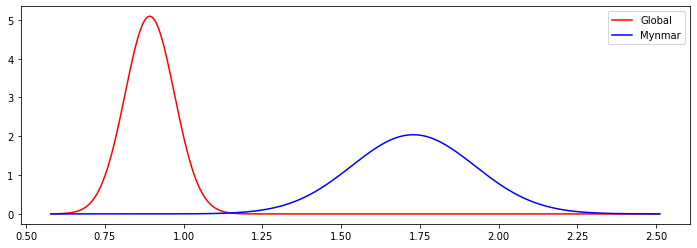

In [101]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(gfm - 4*ste_gp, mfm + 4*ste_mp, num=2000)
ax.plot(t, gp_dist.pdf(t), label="Global", color='red')
ax.plot(t, mp_dist.pdf(t), label ="Mynmar", color='blue')    
ax.legend()

In [102]:
stats.ttest_ind((ds2['fatalities']),(ds3['fatalities']),equal_var=False)

Ttest_indResult(statistic=-3.9626594528748935, pvalue=9.370261007509798e-05)

In [29]:
ds_s=ds2.loc[ds2['country']=='Sudan']
ds_s['data_id'].count(),ds_s['fatalities'].sum(),(ds_s['fatalities'].sum()/ds_s['data_id'].count())

(99, 208, 2.101010101010101)

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

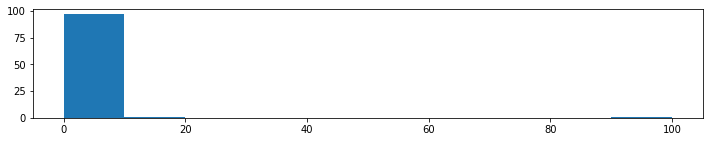

In [30]:
fig, ax = plt.subplots(figsize=(12, 2))
plt.hist(ds_s['fatalities'])

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

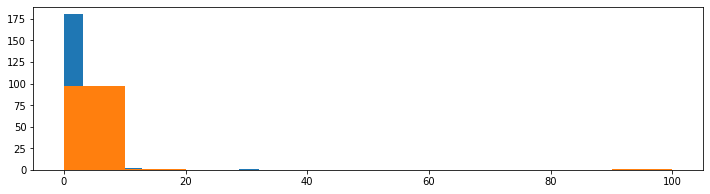

In [31]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(ds3['fatalities'])
plt.hist(ds_s['fatalities'])

In [32]:
spc=ds_s['data_id'].count()
sfm=ds_s['fatalities'].mean()
ste_sp=np.std(ds_s['fatalities']) / np.sqrt(spc)
sp_dist=stats.norm(loc=sfm, scale=ste_sp)
ste_sp,sfm

(1.0106559030909563, 2.101010101010101)

Ttest_indResult(statistic=-0.3596214121583746, pvalue=0.7198500484473533)

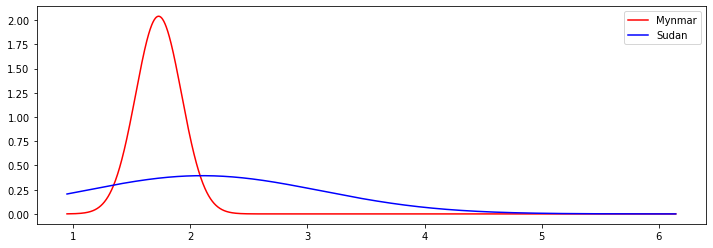

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(mfm - 4*ste_mp, sfm + 4*ste_sp, num=2000)
ax.plot(t, mp_dist.pdf(t), label="Mynmar", color='red')
ax.plot(t, sp_dist.pdf(t), label ="Sudan", color='blue')    
ax.legend()
stats.ttest_ind((ds3['fatalities']),(ds_s['fatalities']),equal_var=False)

In [34]:
ds_n=ds2.loc[df2['country']=='Nicaragua']
ds_n['data_id'].count(),ds_n['fatalities'].sum(),(ds_n['fatalities'].sum()/ds_n['data_id'].count())

(114, 180, 1.5789473684210527)

(array([ 9., 70., 18., 10.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

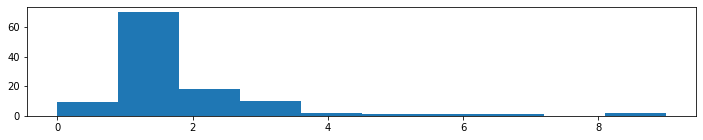

In [35]:
fig, ax = plt.subplots(figsize=(12, 2))
plt.hist(ds_n['fatalities'])

(array([ 9., 70., 18., 10.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

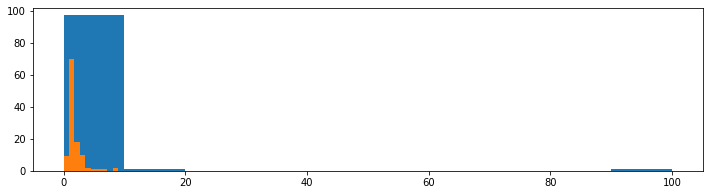

In [36]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(ds_s['fatalities'])
plt.hist(ds_n['fatalities'])

In [37]:
npc=ds_n['data_id'].count()
nfm=ds_n['fatalities'].mean()
ste_np=np.std(ds_n['fatalities']) / np.sqrt(npc)
np_dist=stats.norm(loc=nfm, scale=ste_np)
ste_np,nfm

(0.13919189057219775, 1.5789473684210527)

Ttest_indResult(statistic=0.6232423631925849, pvalue=0.5335612098737399)

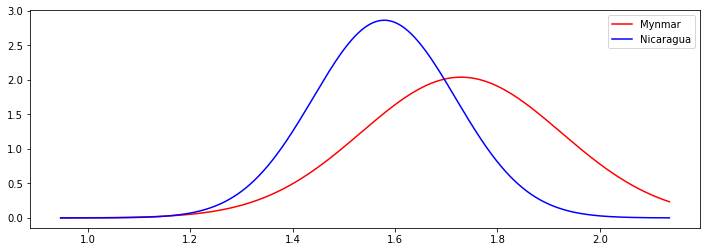

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(mfm - 4*ste_mp, nfm + 4*ste_np, num=2000)
ax.plot(t, mp_dist.pdf(t), label="Mynmar", color='red')
ax.plot(t, np_dist.pdf(t), label ="Nicaragua", color='blue')    
ax.legend()
stats.ttest_ind((ds3['fatalities']),(ds_n['fatalities']),equal_var=False)

Ttest_indResult(statistic=0.509143221206204, pvalue=0.6117545739579404)

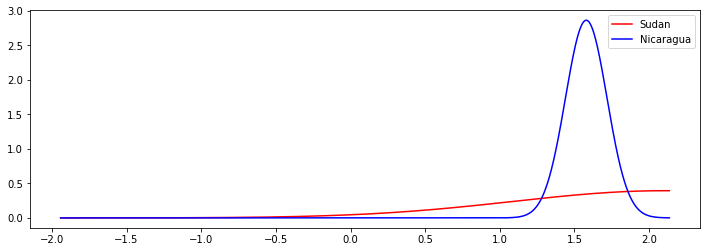

In [39]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(sfm - 4*ste_sp, nfm + 4*ste_np, num=2000)
ax.plot(t, sp_dist.pdf(t), label="Sudan", color='red')
ax.plot(t, np_dist.pdf(t), label ="Nicaragua", color='blue')    
ax.legend()
stats.ttest_ind((ds_s['fatalities']),(ds_n['fatalities']),equal_var=False)

In [40]:
ds_e=ds2.loc[ds2['country']=='Ethiopia']
ds_e['data_id'].count(),ds_e['fatalities'].sum(),(ds_e['fatalities'].sum()/ds_e['data_id'].count())

(70, 150, 2.142857142857143)

(array([39., 13.,  9.,  0.,  3.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

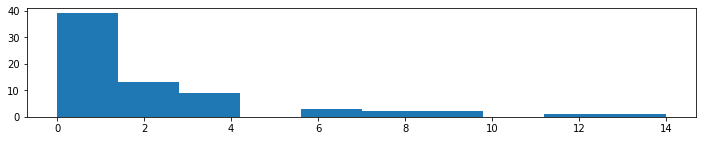

In [41]:
fig, ax = plt.subplots(figsize=(12, 2))
plt.hist(ds_e['fatalities'])

(array([39., 13.,  9.,  0.,  3.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

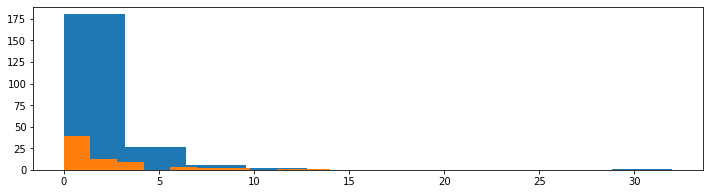

In [42]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(ds3['fatalities'])
plt.hist(ds_e['fatalities'])

In [43]:
epc=ds_e['data_id'].count()
efm=ds_e['fatalities'].mean()
ste_ep=np.std(ds_n['fatalities']) / np.sqrt(epc)
ep_dist=stats.norm(loc=nfm, scale=ste_np)
ste_ep,efm

(0.1776304186354009, 2.142857142857143)

Ttest_indResult(statistic=-1.0352246760984087, pvalue=0.3027213616227141)

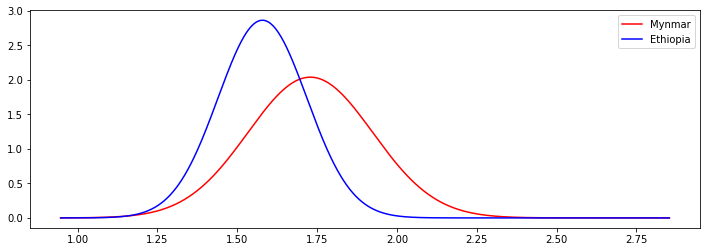

In [106]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(mfm - 4*ste_mp, efm + 4*ste_ep, num=2000)
ax.plot(t, mp_dist.pdf(t), label="Mynmar", color='red')
ax.plot(t, ep_dist.pdf(t), label ="Ethiopia", color='blue')    
ax.legend()
stats.ttest_ind((ds3['fatalities']),(ds_e['fatalities']),equal_var=False)

Ttest_indResult(statistic=-0.03896684395396121, pvalue=0.9689815427905608)

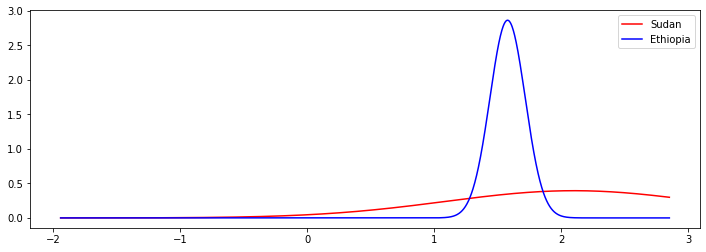

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(sfm - 4*ste_sp, efm + 4*ste_ep, num=2000)
ax.plot(t, sp_dist.pdf(t), label="Sudan", color='red')
ax.plot(t, ep_dist.pdf(t), label ="Ethiopia", color='blue')    
ax.legend()
stats.ttest_ind((ds_s['fatalities']),(ds_e['fatalities']),equal_var=False)

In [46]:
ds_i=ds2.loc[ds2['country']=='Iraq']
ds_i['data_id'].count(),ds_i['fatalities'].sum(),(ds_i['fatalities'].sum()/ds_i['data_id'].count())

(66, 120, 1.8181818181818181)

In [47]:
ipc=ds_i['data_id'].count()
ifm=ds_i['fatalities'].mean()
ste_ip=np.std(ds_i['fatalities']) / np.sqrt(ipc)
ip_dist=stats.norm(loc=ifm, scale=ste_ip)
ste_ip,ifm

(0.49880899975031107, 1.8181818181818181)

(array([54.,  6.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

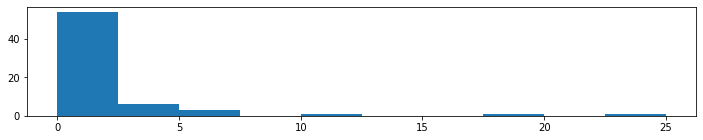

In [48]:
fig, ax = plt.subplots(figsize=(12, 2))
plt.hist(ds_i['fatalities'])

(array([54.,  6.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

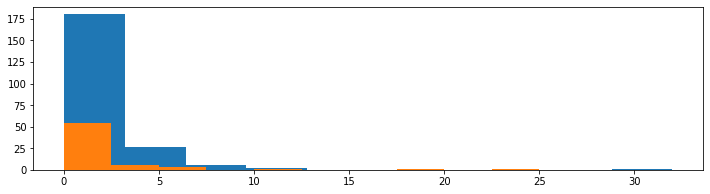

In [49]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(ds3['fatalities'])
plt.hist(ds_i['fatalities'])

Ttest_indResult(statistic=-0.1653632143490673, pvalue=0.869047762161167)

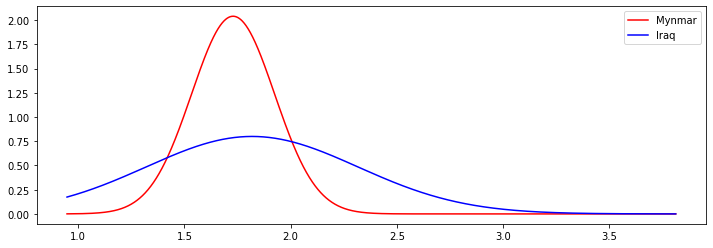

In [50]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(mfm - 4*ste_mp, ifm + 4*ste_ip, num=2000)
ax.plot(t, mp_dist.pdf(t), label="Mynmar", color='red')
ax.plot(t, ip_dist.pdf(t), label ="Iraq", color='blue')    
ax.legend()
stats.ttest_ind((ds3['fatalities']),(ds_i['fatalities']),equal_var=False)

Ttest_indResult(statistic=0.24955029804563192, pvalue=0.8033028151803331)

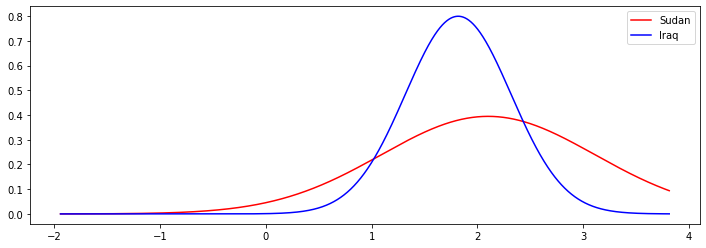

In [51]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(sfm - 4*ste_sp, ifm + 4*ste_ip, num=2000)
ax.plot(t, sp_dist.pdf(t), label="Sudan", color='red')
ax.plot(t, ip_dist.pdf(t), label ="Iraq", color='blue')    
ax.legend()
stats.ttest_ind((ds_s['fatalities']),(ds_i['fatalities']),equal_var=False)

In [52]:
d_pr1.groupby('country')['fatalities'].sum(),d_pr1.groupby('country')['data_id'].count(),df2_pr1.groupby('country')['data_id'].count()

(country
 Cambodia         0
 Indonesia        1
 Myanmar        370
 Philippines      0
 Thailand         0
 Vietnam          0
 Name: fatalities, dtype: int64,
 country
 Cambodia         5
 Indonesia       11
 Myanmar        214
 Philippines      2
 Thailand         1
 Vietnam          3
 Name: data_id, dtype: int64,
 country
 Cambodia        188
 Indonesia      2821
 Laos              1
 Malaysia        319
 Myanmar        4364
 Philippines     733
 Thailand       1427
 Vietnam          39
 Name: data_id, dtype: int64)

In [53]:
d_pr5.groupby('country')['fatalities'].sum(),d_pr5.groupby('country')['data_id'].count(),df2_pr5.groupby('country')['data_id'].count()

(country
 Burundi          0
 Djibouti         0
 Ethiopia       150
 Kenya            5
 Malawi           0
 Mozambique       0
 Somalia          8
 South Sudan      0
 Uganda           4
 Name: fatalities, dtype: int64,
 country
 Burundi         1
 Djibouti        5
 Ethiopia       70
 Kenya           8
 Malawi          1
 Mozambique      3
 Somalia        22
 South Sudan     1
 Uganda         18
 Name: data_id, dtype: int64,
 country
 Burundi        108
 Djibouti        40
 Eritrea          1
 Ethiopia       351
 Kenya          285
 Madagascar      72
 Malawi         166
 Mozambique      45
 Rwanda           3
 Somalia        251
 South Sudan     66
 Tanzania        18
 Uganda         217
 Name: data_id, dtype: int64)

In [54]:
d_pr4.groupby('country')['fatalities'].sum(),d_pr4.groupby('country')['data_id'].count(),df2_pr4.groupby('country')['data_id'].count()

(country
 Bahrain        1
 Iran           0
 Iraq         120
 Israel         0
 Lebanon        1
 Palestine      3
 Syria         20
 Turkey         3
 Yemen         25
 Name: fatalities, dtype: int64,
 country
 Bahrain       2
 Iran          9
 Iraq         66
 Israel        7
 Lebanon      12
 Palestine    84
 Syria        36
 Turkey        7
 Yemen        47
 Name: data_id, dtype: int64,
 country
 Bahrain                 1223
 Iran                    6798
 Iraq                    3453
 Israel                  8206
 Jordan                   442
 Kuwait                    37
 Lebanon                 6163
 Oman                      16
 Palestine                672
 Qatar                     15
 Saudi Arabia               5
 Syria                   1405
 Turkey                  4001
 United Arab Emirates       1
 Yemen                   1657
 Name: data_id, dtype: int64)

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <BarContainer object of 10 artists>)

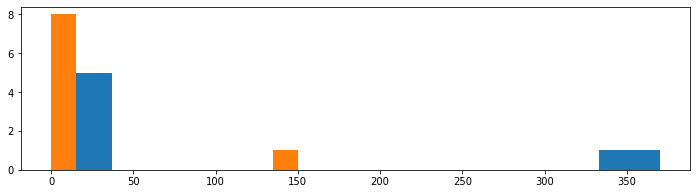

In [55]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(d_pr1.groupby('country')['fatalities'].sum())
plt.hist(d_pr5.groupby('country')['fatalities'].sum())

(array([6., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

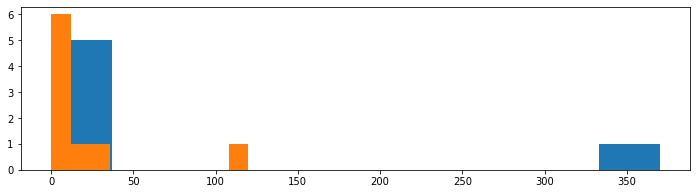

In [56]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(d_pr1.groupby('country')['fatalities'].sum())
plt.hist(d_pr4.groupby('country')['fatalities'].sum())

(array([5., 1., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 1. ,  7.9, 14.8, 21.7, 28.6, 35.5, 42.4, 49.3, 56.2, 63.1, 70. ]),
 <BarContainer object of 10 artists>)

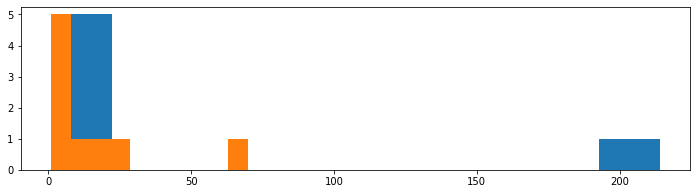

In [57]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(d_pr1.groupby('country')['data_id'].count())
plt.hist(d_pr5.groupby('country')['data_id'].count())

(array([4., 1., 0., 0., 1., 1., 0., 1., 0., 1.]),
 array([ 2. , 10.2, 18.4, 26.6, 34.8, 43. , 51.2, 59.4, 67.6, 75.8, 84. ]),
 <BarContainer object of 10 artists>)

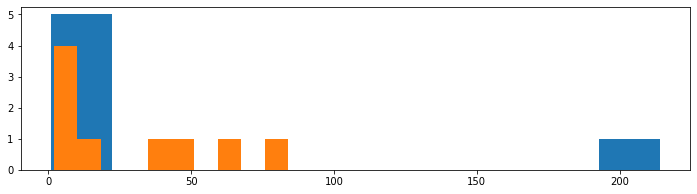

In [58]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(d_pr1.groupby('country')['data_id'].count())
plt.hist(d_pr4.groupby('country')['data_id'].count())

(array([3., 3., 1., 1., 1., 0., 1., 1., 1., 1.]),
 array([  1.,  36.,  71., 106., 141., 176., 211., 246., 281., 316., 351.]),
 <BarContainer object of 10 artists>)

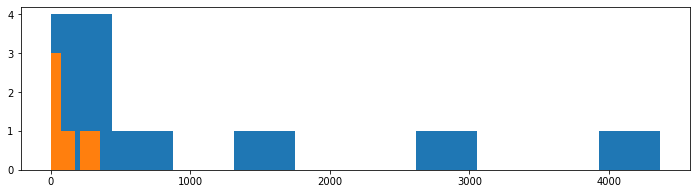

In [59]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(df2_pr1.groupby('country')['data_id'].count())
plt.hist(df2_pr5.groupby('country')['data_id'].count())

(array([7., 2., 1., 0., 2., 0., 0., 1., 1., 1.]),
 array([1.0000e+00, 8.2150e+02, 1.6420e+03, 2.4625e+03, 3.2830e+03,
        4.1035e+03, 4.9240e+03, 5.7445e+03, 6.5650e+03, 7.3855e+03,
        8.2060e+03]),
 <BarContainer object of 10 artists>)

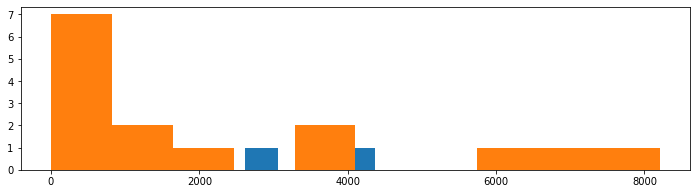

In [60]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(df2_pr1.groupby('country')['data_id'].count())
plt.hist(df2_pr4.groupby('country')['data_id'].count())

In [75]:
seaf=d_pr1.groupby('country')['fatalities'].sum()
seaf_m=seaf/6
ste_seaf=np.std(seaf) / np.sqrt(6)
seaf_dist=stats.norm(loc=seaf_m, scale=ste_seaf)


mef=d_pr4.groupby('country')['fatalities'].sum()
mef_m=mef/9
ste_mef=np.std(mef) / np.sqrt(9)
mef_dist=stats.norm(loc=mef_m, scale=ste_mef)


eaff=d_pr5.groupby('country')['fatalities'].sum()
eaff_m=eaff/9
ste_eaff=np.std(eaff) / np.sqrt(9)
eaff_dist=stats.norm(loc=eaff_m, scale=ste_eaff)


seae=d_pr1.groupby('country')['data_id'].count()
seae_m=seae/6
ste_seae=np.std(seae) / np.sqrt(6)
seae_dist=stats.norm(loc=seae_m, scale=ste_seae)


mee=d_pr4.groupby('country')['data_id'].count()
mee_m=mee/9
ste_mee=np.std(mee) / np.sqrt(9)
mee_dist=stats.norm(loc=mee_m, scale=ste_mee)


eafe=d_pr5.groupby('country')['data_id'].count()
eafe_m=eafe/9
ste_eafe=np.std(eafe) / np.sqrt(9)
eafe_dist=stats.norm(loc=eafe_m, scale=ste_eafe)


seap=df2_pr1.groupby('country')['data_id'].count()
seap_m=seap/8
ste_seap=np.std(seaf) / np.sqrt(8)
seap_dist=stats.norm(loc=seap_m, scale=ste_seap)
ste_ip,ifm

mep=df2_pr4.groupby('country')['data_id'].count()
mep_m=mep/15
ste_mep=np.std(mep) / np.sqrt(15)
mep_dist=stats.norm(loc=mep_m, scale=ste_mep)


eafp=df2_pr5.groupby('country')['data_id'].count()
eafp_m=eafp/13
ste_eafp=np.std(eafp) / np.sqrt(13)
eafp_dist=stats.norm(loc=eafp_m, scale=ste_eafp)


In [64]:
seaf=d_pr1.groupby('country')['fatalities'].sum()
seaf.sum()


371

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(seaf_m - 4*ste_seaf, mef_m + 4*ste_mef, num=2000)
ax.plot(t,seaf_dist.pdf, label="Southeast Asia", color='red')
ax.plot(t,mef_dist.pdf, label ="Middle East", color='blue')    
ax.legend()
stats.ttest_ind((seaf),(mef),equal_var=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(seaf_m - 4*ste_seaf, eaff_m + 4*ste_eaff, num=2000)
ax.plot(t, seaf_dist.pdf(t), label="Southeast Asia", color='red')
ax.plot(t, eaff_dist.pdf(t), label ="Eastern Africa", color='blue')    
ax.legend()
stats.ttest_ind((seaf),(eaff),equal_var=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(seae_m - 4*ste_seae, mee_m + 4*ste_mee, num=2000)
ax.plot(t, seae_dist.pdf(t), label="Southeast Asia", color='red')
ax.plot(t, mee_dist.pdf(t), label ="Middle East", color='blue')    
ax.legend()
stats.ttest_ind((seae),(mee),equal_var=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(seae_m - 4*ste_seae, eafe_m + 4*ste_eafe, num=2000)
ax.plot(t, seae_dist.pdf(t), label="Southeast Asia", color='red')
ax.plot(t, eafe_dist.pdf(t), label ="Eastern Africa", color='blue')    
ax.legend()
stats.ttest_ind((seae),(eafe),equal_var=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(seap_m - 4*ste_seap, mep_m + 4*ste_mep, num=2000)
ax.plot(t, seap_dist.pdf(t), label="Southeast Asia", color='red')
ax.plot(t, mep_dist.pdf(t), label ="Middle East", color='blue')    
ax.legend()
stats.ttest_ind((seap),(mep),equal_var=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
t= np.linspace(seap_m - 4*ste_seap, eafp_m + 4*ste_eafp, num=2000)
ax.plot(t, seap_dist.pdf(t), label="Southeast Asia", color='red')
ax.plot(t, eafp_dist.pdf(t), label ="Eastern Africa", color='blue')    
ax.legend()
stats.ttest_ind((seap),(eafp),equal_var=False)

country
Cambodia         0
Indonesia        1
Myanmar        370
Philippines      0
Thailand         0
Vietnam          0
Name: fatalities, dtype: int64

In [92]:
stats.ttest_ind((seaf),(mef),equal_var=False)

Ttest_indResult(statistic=0.6765354776117023, pvalue=0.5263686503129079)

In [93]:
stats.ttest_ind((seaf),(eaff),equal_var=False)

Ttest_indResult(statistic=0.678403894968765, pvalue=0.5239929830616097)

In [94]:
stats.ttest_ind((seae),(mee),equal_var=False)

Ttest_indResult(statistic=0.2567295196075339, pvalue=0.8062202402773773)

In [95]:
stats.ttest_ind((seae),(eafe),equal_var=False)

Ttest_indResult(statistic=0.6994698473286108, pvalue=0.5129698650284591)

In [96]:
stats.ttest_ind((seap),(mep),equal_var=False)

Ttest_indResult(statistic=-1.1373126470850563, pvalue=0.26832181338760663)

In [97]:
stats.ttest_ind((seap),(eafp),equal_var=False)

Ttest_indResult(statistic=1.9861813619150972, pvalue=0.08710638206598316)

(array([ 9., 70., 18., 10.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

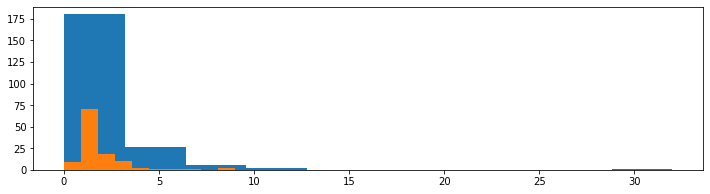

In [105]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(ds3['fatalities'])
plt.hist(ds_n['fatalities'])